In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error


%matplotlib inline

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('/Users/veenakumar/ds/metis/metisgh/sf16_ds4/challenges/03-linear_splitting/2013_movies.csv')

In [3]:
df = df.dropna()

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


# Challenge 3.1

1. Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? 
2. Make a plot of predictions against actual outcome. 
3. Make a histogram of residuals. How are the residuals distributed?

In [7]:
#Results are n/a. A static variable does not help predict anything.
y, X = patsy.dmatrices('DomesticTotalGross ~ 1', data=df, return_type="dataframe")
model = sm.OLS(y, X)
fit1 = model.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sun, 16 Oct 2016   Prob (F-statistic):                nan
Time:                        14:37:28   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.035e+08   9.43e+06     10.975      0.000      8.48e+07  1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

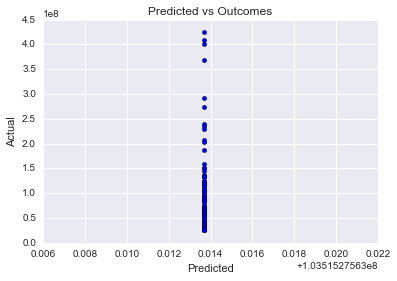

In [20]:
#Plot of predictions vs outcomes.
y_pred = fit1.predict(X)
# y_true = y.values.flatten()
plt.scatter(y_pred,y)
plt.title('Predicted vs Outcomes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

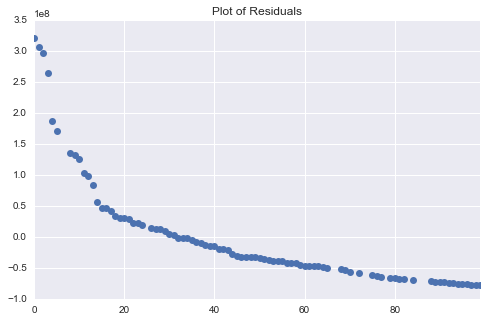

In [10]:
#Plot of residuals
fit1.resid.plot(style='o', figsize=(8,5))
plt.title('Plot of Residuals');

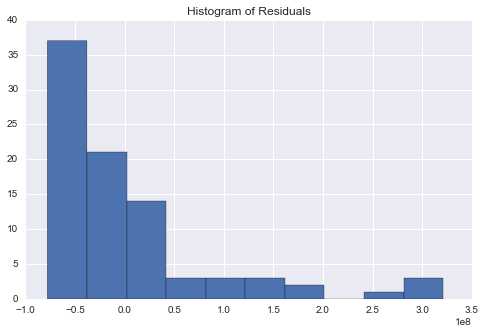

In [12]:
#Histogram of residuals.
fit1.resid.hist(figsize=(8,5));
plt.title('Histogram of Residuals');

# Challenge 3.2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [22]:
y2, X2 = patsy.dmatrices('DomesticTotalGross ~ Budget', data=df, return_type="dataframe")
X2 = sm.add_constant(X2)
model = sm.OLS(y2, X2)
fit2 = model.fit()
fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sun, 16 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        14:48:25   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

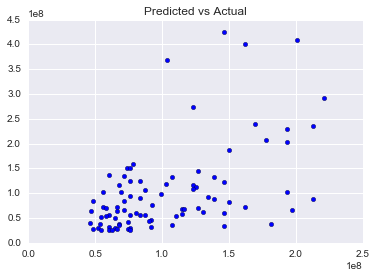

In [25]:
y_pred2 = fit2.predict(X2)
plt.scatter(y_pred2,y2)
plt.title('Predicted vs Actual');

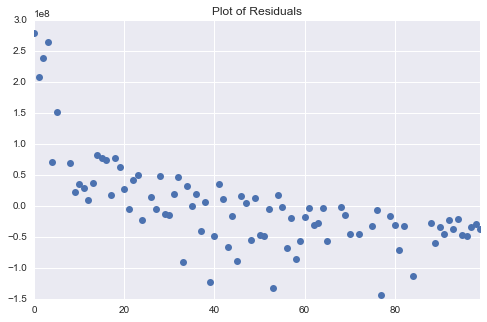

In [28]:
#Plot of residuals
fit2.resid.plot(style='o', figsize=(8,5))
plt.title('Plot of Residuals');

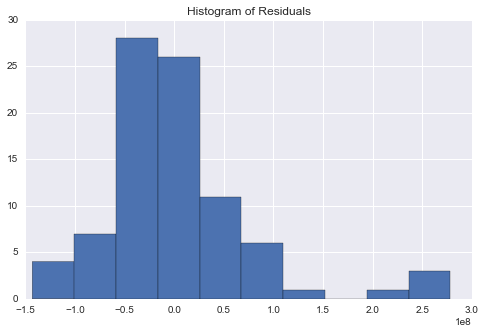

In [29]:
#Histogram of residuals.
fit2.resid.hist(figsize=(8,5));
plt.title('Histogram of Residuals');

# Exercise 3.3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?



In [30]:
ratings = pd.get_dummies(df['Rating'])

In [31]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 3 columns):
PG       87 non-null float64
PG-13    87 non-null float64
R        87 non-null float64
dtypes: float64(3)
memory usage: 2.7 KB


In [32]:
df_ratings = df[['DomesticTotalGross','Rating']]

In [33]:
df_ratings = pd.get_dummies(df_ratings)

In [34]:
df_ratings.columns

Index([u'DomesticTotalGross', u'Rating_PG', u'Rating_PG-13', u'Rating_R'], dtype='object')

In [35]:
y3, X3 = patsy.dmatrices('DomesticTotalGross ~ Q("Rating_PG") + Q("Rating_PG-13") + Q("Rating_R")', data=df_ratings, return_type="dataframe")
model = sm.OLS(y3, X3)
fit3 = model.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Sun, 16 Oct 2016   Prob (F-statistic):             0.0440
Time:                        14:52:04   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          8.098e+07   7.63e+06     10.609      0.000      6.58e+07  9.62e+07
Q("Rating_PG")     5.097e+07   1.79e+07      2.845      0.006      1.53e+07  8.66e+07
Q("Rating_PG-13")  3.675e+07   1.23e+07      2.999      0.004      1.24e+07  6.11e+07
Q("Rating_R")     -6.747e+06    1.3e+07     -0.518      0.606     -3.27e+07  1.92e+07
==============================================================================
Omnibus:                       39.974   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           1.759   Prob(JB):                     5.96e-19
Kurtosis:                       6.283   Cond. No.                     8.29e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#Plot of predictions vs outcomes.
y_pred3 = fit3.predict(X3)

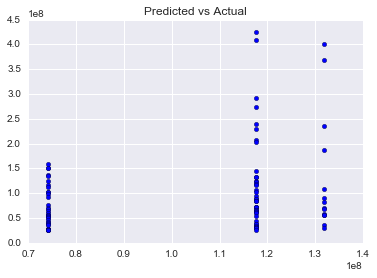

In [44]:
plt.scatter(y_pred3,y3)
plt.title('Predicted vs Actual');

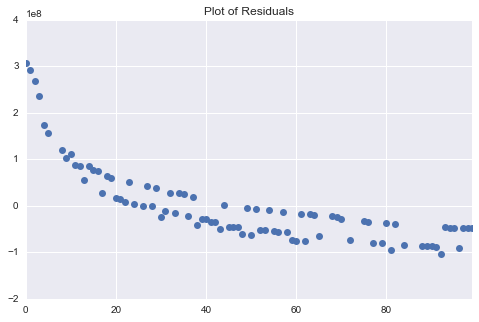

In [47]:
#Plot of residuals
fit3.resid.plot(style='o', figsize=(8,5))
plt.title('Plot of Residuals');

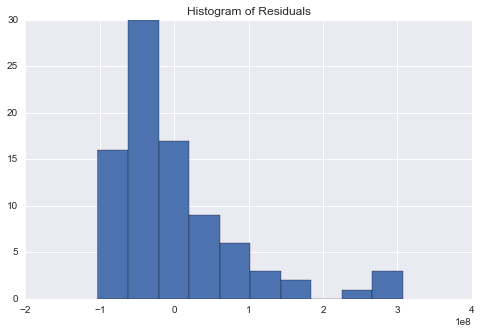

In [48]:
#Histogram of residuals.
fit3.resid.hist(figsize=(8,5))
plt.title('Histogram of Residuals');

# Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


In [51]:
df_new = df[['DomesticTotalGross','Runtime','Rating']]

In [52]:
df_new = pd.get_dummies(df_new)

In [53]:
y4, X4 = patsy.dmatrices('DomesticTotalGross ~ Q("Runtime") + Q("Rating_PG") + Q("Rating_PG-13") + Q("Rating_R")', data=df_new, return_type="dataframe")
model = sm.OLS(y4, X4)
fit4 = model.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     5.197
Date:                Sun, 16 Oct 2016   Prob (F-statistic):            0.00244
Time:                        14:56:23   Log-Likelihood:                -1706.9
No. Observations:                  87   AIC:                             3422.
Df Residuals:                      83   BIC:                             3432.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -4.563e+07    4.4e+07     -1.038      0.302     -1.33e+08  4.18e+07
Q("Runtime")       1.537e+06   5.26e+05      2.920      0.005       4.9e+05  2.58e+06
Q("Rating_PG")     2.348e+07   1.96e+07      1.199      0.234     -1.55e+07  6.24e+07
Q("Rating_PG-13") -1.696e+07   2.18e+07     -0.777      0.439     -6.04e+07  2.64e+07
Q("Rating_R")     -5.215e+07   1.99e+07     -2.616      0.011     -9.18e+07 -1.25e+07
==============================================================================
Omnibus:                       36.398   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.349
Skew:                           1.653   Prob(JB):                     8.73e-16
Kurtosis:                       5.864   Cond. No.                     6.65e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
y_pred4 = fit4.predict(X4)

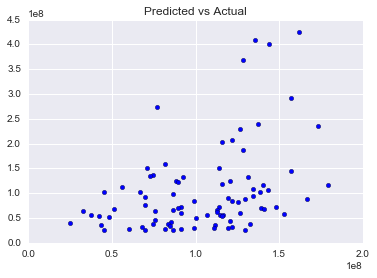

In [56]:
plt.scatter(y_pred4,y4)
plt.title('Predicted vs Actual');

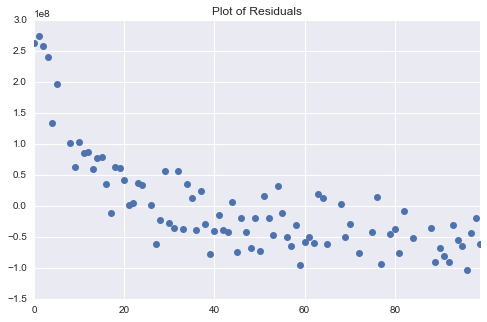

In [57]:
#Plot of residuals
fit4.resid.plot(style='o', figsize=(8,5))
plt.title('Plot of Residuals');

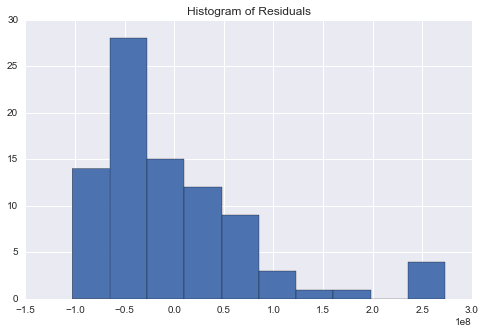

In [58]:
#Histogram of residuals.
fit4.resid.hist(figsize=(8,5));
plt.title('Histogram of Residuals');

# Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [64]:
y = df_new.iloc[:,0]
X = df_new.iloc[:,1:]

In [65]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


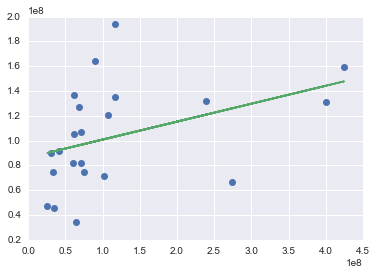

In [66]:
plt.plot(y_test,y_pred, 'o')
x = y_test
y = y_pred
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')